<a href="https://colab.research.google.com/github/OM-VIT/Python-Machine-Learning-Notebooks/blob/main/hybrid_algo_(LR%2CNaive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading the data
dataset = pd.read_csv('/content/drive/MyDrive/Phishing Website Detection Dataset /phishing_site_urls.csv')
dataset.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
dataset.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
#Checking the shape of the dataset
dataset.shape

(549346, 2)

In [7]:
#Listing the features of the dataset
dataset.columns

Index(['URL', 'Label'], dtype='object')

In [8]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
dataset.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

Data Visualizations

In [10]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(dataset.Label.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


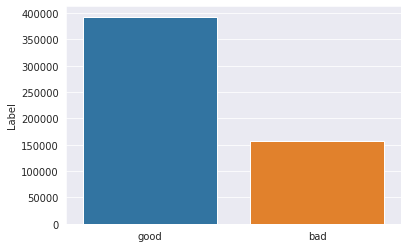

In [11]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

Data Standardization

In [12]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [13]:
# Labels
y = dataset["Label"]

In [14]:
# Features
url_list = dataset["URL"]

In [15]:
# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [16]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(549346, 912674) (439476, 912674) (109870, 912674)


In [19]:
#Input = test data article
test=["serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/"]

Training the Model

**Logistic regression**

In [20]:
from sklearn.linear_model import LogisticRegression
# create lr object
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
# Accuracy of Our Model with our Custom Token
Accuracy= lr.score(X_test, y_test)
print("Accuracy ",lr.score(X_test, y_test))

Accuracy  0.9590971147720033


**Multinomial Naive Bayes**

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
# accuracy score on the test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)


In [25]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9785018658414489


In [26]:
#Predictions form all the above algorithms are either 1 or 0 
#where 1 denotes the real url and 0 denotes the fake url
heva=int(Accuracy)+int(test_data_accuracy)
#HEVA = Hybrid Ensembled Voting algorithm
print(heva)

0


In [27]:
#if HEVA greater than or equal to 3 then REAL else FAKE
news=""
if heva>=1:
    news='real url'
else:
    news='phishing url'
print(news)

phishing url


In [28]:
from sklearn.ensemble import VotingClassifier
#hard-vote:the predicted output class is a class with the highest majority of votes
#soft-vote:the output class is the prediction based on the average of probability given to that class.

**1.Logestic Regression + MultinomialNB**

In [29]:
# group / ensemble of models 
estimator = [] 
estimator.append(('LR', LogisticRegression())) 
estimator.append(('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))) 

In [30]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hard Voting Score  0.9776736142714116


In [31]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Soft Voting Score  0.9719304632747793



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96     30387
        Good       0.99      0.98      0.98     79483

    accuracy                           0.98    109870
   macro avg       0.97      0.98      0.97    109870
weighted avg       0.98      0.98      0.98    109870


CONFUSION MATRIX


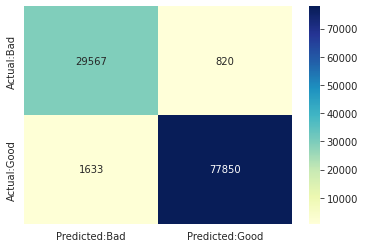

In [32]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Decision Tree**

In [33]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
# accuracy score on the test data
X_test_prediction = tree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8001820333120961


**Random Forest**

In [36]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [37]:
X_test_prediction = forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [38]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7160280331300628


**Decision Tree + Random Forest**

In [39]:
# group / ensemble of models 
estimator2 = [] 
estimator2.append(('tree',DecisionTreeClassifier(max_depth = 5))) 
estimator2.append(('forest', RandomForestClassifier(max_depth=5))) 

In [40]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator2, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

Hard Voting Score  0.8001820333120961


In [41]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator2, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

Soft Voting Score  0.7925639392008738



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.33      0.91      0.48     11232
        Good       0.99      0.79      0.88     98638

    accuracy                           0.80    109870
   macro avg       0.66      0.85      0.68    109870
weighted avg       0.92      0.80      0.84    109870


CONFUSION MATRIX FOR DT+RF


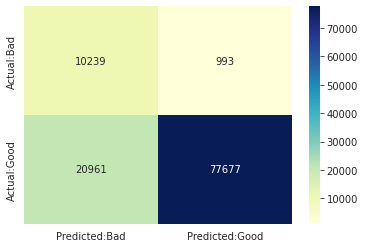

In [42]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR DT+RF')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")